In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

Mounted at /content/gdrive


In [3]:
import os
path = "/content/gdrive/MyDrive/DATA Science 1/Artificial Intelligence/Project/Test round 3/InceptionV3_3"
print(os.listdir(path))

['train', 'validation', 'test']


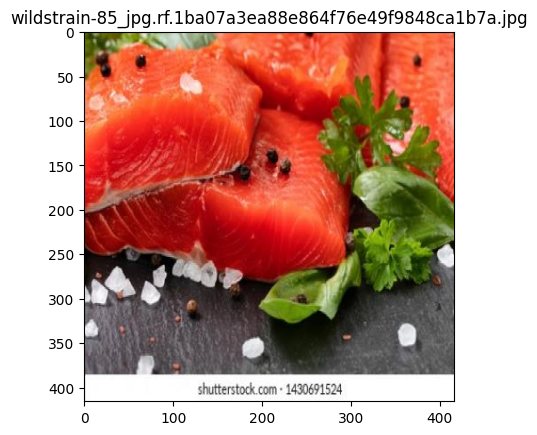

In [4]:
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

filename_paper = os.listdir(path+"/train/Salmon")
sample = random.choice(filename_paper)
image = tf.keras.utils.load_img(path+"/train/Salmon/"+sample)
plt.title(sample)
plt.imshow(image)

In [5]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(path+'/train', image_size=(224, 224), batch_size=32, shuffle=True)
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(path+'/validation', image_size=(224, 224), batch_size=16, shuffle=False)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(path+'/test', image_size=(224, 224), batch_size=16, shuffle=False)

class_names = train_dataset.class_names

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomBrightness(0.2),
    tf.keras.layers.RandomContrast(0.2)
])

preprocess = tf.keras.applications.inception_v3.preprocess_input

def preprocess_data(image, label):
    image = data_augmentation(image)
    image = preprocess(image)
    return image, label

train_set = train_dataset.map(preprocess_data)
val_set = validation_dataset.map(lambda x, y: (preprocess(x), y))
test_set = test_dataset.map(lambda x, y: (preprocess(x), y))

AUTOTUNE = tf.data.AUTOTUNE
train_set = train_set.cache().prefetch(buffer_size=AUTOTUNE)
val_set = val_set.cache().prefetch(buffer_size=AUTOTUNE)
test_set = test_set.cache().prefetch(buffer_size=AUTOTUNE)

Found 1372 files belonging to 2 classes.
Found 294 files belonging to 2 classes.
Found 294 files belonging to 2 classes.


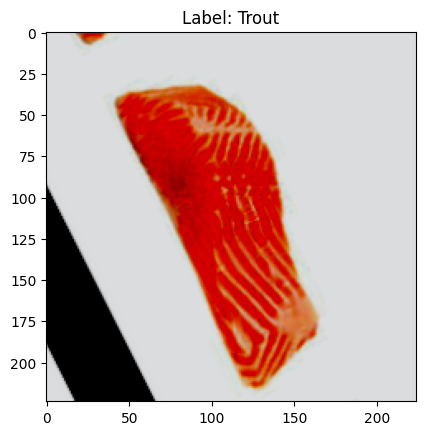

In [6]:
for X_train_batch, y_train_batch in train_set.take(1):
    image_to_display = X_train_batch[0]
    plt.imshow(image_to_display)
    plt.axis('on')
    plt.title(f'Label: {class_names[int(y_train_batch[0])]}')
    plt.show()

# for X_train_batch, y_train_batch in train_set.take(1):
#     image_to_display = X_train_batch[0].numpy()
#     plt.imshow(image_to_display.astype("uint8"))
#     plt.axis('on')
#     plt.title(f'Label: {class_names[int(y_train_batch[0])]}')
#     plt.show()

In [9]:
# base_model = tf.keras.applications.MobileNetV2(input_shape=(200,200,3), include_top=False, weights='imagenet')
# base_model = tf.keras.applications.VGG16(input_shape=(200,200,3), include_top=False, weights='imagenet')
# base_model = tf.keras.applications.ResNet50(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
# base_model = tf.keras.applications.EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
# base_model = tf.keras.applications.DenseNet121(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
# base_model = tf.keras.applications.Xception(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
base_model = tf.keras.applications.InceptionV3(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

for layer in base_model.layers[:250]:
    layer.trainable = False
for layer in base_model.layers[250:]:
    layer.trainable = True

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(2048, activation='relu')(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
predictions = tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.02))(x)

model = tf.keras.Model(inputs=base_model.input, outputs=predictions)
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_94 (Conv2D)        │ (None, 111, 111, 32)   │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_94    │ (None, 111, 111, 32)   │             96 │ conv2d_94[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_94             │ (None, 111, 111, 32)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_95 (Conv2D)        │ (None, 109, 109, 32)   │          9,216 │ activation_94[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_95    │ (None, 109, 109, 32)   │             96 │ conv2d_95[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_95             │ (None, 109, 109, 32)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_96 (Conv2D)        │ (None, 109, 109, 64)   │         18,432 │ activation_95[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_96    │ (None, 109, 109, 64)   │            192 │ conv2d_96[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_96             │ (None, 109, 109, 64)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 54, 54, 64)     │              0 │ activation_96[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_97 (Conv2D)        │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_97    │ (None, 54, 54, 80)     │            240 │ conv2d_97[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_97             │ (None, 54, 54, 80)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_98 (Conv2D)   

 Total params: 28,622,625 (109.19 MB)

 Trainable params: 17,361,281 (66.23 MB)

 Non-trainable params: 11,261,344 (42.96 MB)

In [10]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)

history = model.fit(train_set, validation_data=val_set, epochs=30, callbacks=[early_stopping, learning_rate_reduction])

Epoch 1/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 253s 6s/step - accuracy: 0.4903 - loss: 0.7580 - val_accuracy: 0.5000 - val_loss: 0.7299 - learning_rate: 1.0000e-04
Epoch 2/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 240s 6s/step - accuracy: 0.4785 - loss: 0.7562 - val_accuracy: 0.5102 - val_loss: 0.7294 - learning_rate: 1.0000e-04
Epoch 3/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 258s 5s/step - accuracy: 0.5367 - loss: 0.7243 - val_accuracy: 0.5000 - val_loss: 0.7278 - learning_rate: 1.0000e-04
Epoch 4/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 264s 6s/step - accuracy: 0.5375 - loss: 0.7287 - val_accuracy: 0.5170 - val_loss: 0.7260 - learning_rate: 1.0000e-04
Epoch 5/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 234s 5s/step - accuracy: 0.5610 - loss: 0.7231 - val_accuracy: 0.5204 - val_loss: 0.7244 - learning_rate: 1.0000e-04
Epoch 6/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 264s 5s/step - accuracy: 0.5855 - loss: 0.7207 - val_accuracy: 0.5306 - val_loss: 0.7226 - learning_rate: 1.0000e-04
Epoch 7/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 241s 6s/step - accuracy: 0.5857 

# Accuracy

In [11]:
val_loss, val_accuracy = model.evaluate(val_set)
print(f"validation accuracy: {val_accuracy * 100:.2f}%")

19/19 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.6073 - loss: 0.6926
validation accuracy: 58.50%


In [12]:
test_loss, test_accuracy = model.evaluate(test_set)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

19/19 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - accuracy: 0.8013 - loss: 0.6180
Test accuracy: 66.33%


# Learning Curve

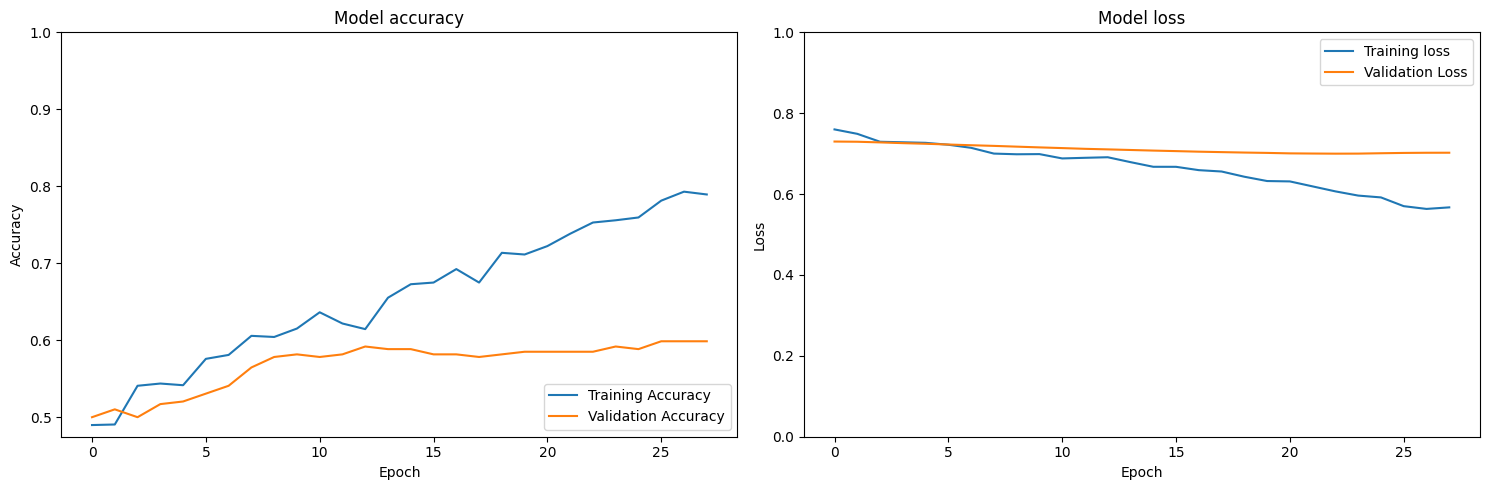

In [13]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.ylim([0, 1])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Confusion Matrix

10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step
Confusion Matrix:
[[122  25]
 [ 74  73]]


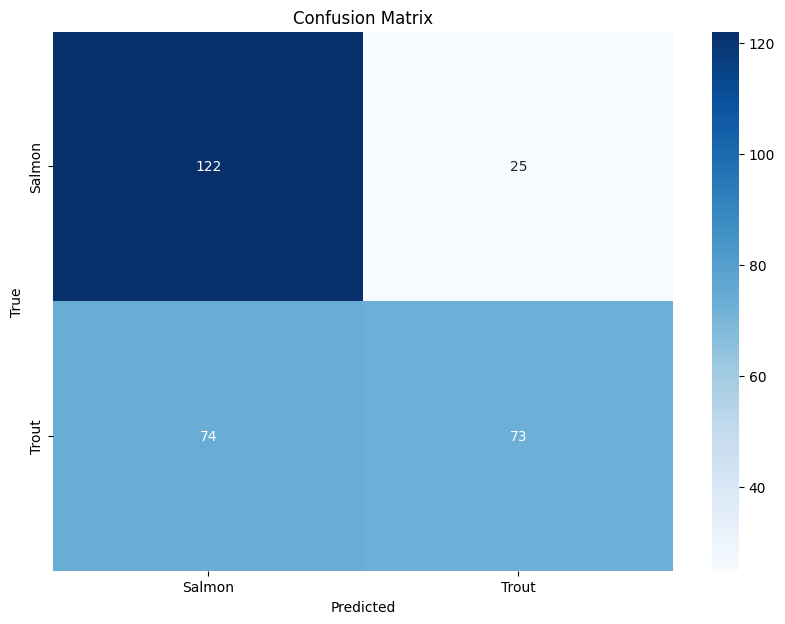

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

X_test, y_test = [], []
for batch in test_set:
    x_batch, y_batch = batch
    X_test.append(x_batch)
    y_test.append(y_batch)

X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)

y_pred = model.predict(X_test)

y_pred_classes = (y_pred > 0.5).astype(int).flatten()
y_true = y_test.flatten()

cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Salmon', 'Trout'], yticklabels=['Salmon', 'Trout'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report

In [15]:
report = classification_report(y_true, y_pred_classes, target_names=['Salmon', 'Trout'])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      Salmon       0.62      0.83      0.71       147
       Trout       0.74      0.50      0.60       147

    accuracy                           0.66       294
   macro avg       0.68      0.66      0.65       294
weighted avg       0.68      0.66      0.65       294



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Prediction result: [[0.6655153]]
Predicted class: Trout


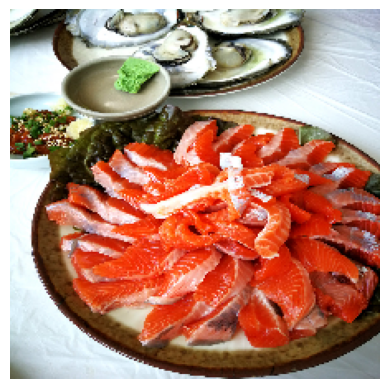

In [16]:
from keras.preprocessing import image

test_image = image.load_img('/content/gdrive/MyDrive/DATA Science 1/Artificial Intelligence/Project/Test round 3/InceptionV3_3/test/Trout/41715929901_8b548d7b44_b.jpg', target_size=(224, 224))
plt.imshow(test_image)

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0

result = model.predict(test_image)
print(f"Prediction result: {result}")

predicted_class_index = (result[0][0] > 0.5)
if predicted_class_index:
    prediction = 'Trout'
else:
    prediction = 'Salmon'

print(f"Predicted class: {prediction}")

plt.axis('off')
plt.show()

In [17]:
model.save("/content/gdrive/MyDrive/DATA Science 1/Artificial Intelligence/Project/Test round 3/InceptionV3_3.h5")